## The adiabatic parameter for rotations
Emma Klemets   
Sept. 2022   
Full documentation of the theory can be found at: https://www.overleaf.com/read/rfkkhhwwfjct

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Markdown, Math

This code follows the method in 
> Use of Rotating Coordinates in Magnetic Resonance Problems   
I. I. Rabi, N. F. Ramsey, and J. Schwinger   
Rev. Mod. Phys. 26, 167 (1954).   
> https://doi.org/10.1103/RevModPhys.26.167

Initially, the spin points along the $+y$ direction, and so does the magnetic field.  Then, the magnetic field begins to slowly rotate until pointing along the $+z$ direction.  In the adiabatic limit, where the magnetic field vector changes slowly compared to the Larmor frequency, the spin is dragged along with the magnetic field.

This is done by transforming to a doubly rotating frame of reference where the Bloch equation is trivial to solve. Then using the intial condition of the polarization vector, the full time dependant solution is transformed back into the lab frame.

<p align="middle">
<img align="middle" src="./reference photos/frames.jpg" width="700" title="Different frames of reference" />  
</p>

$\vec{B}$: Magnetic field , changes from $+y$ to $+z$   
$\vec{\Omega}$: Angular frequency of the changing magnetic field in the UCN frame   
$\vec{\omega_L}$: Larmor precession frequency due to $\vec{B}$   
$\vec{a}$: Angular frequency of the precession seen in $F_{fot}$     
$$
\vec{a} = -\vec{\omega}_{eff} = - (\vec{\Omega} + \vec{\omega_L}) 
\implies a = \sqrt{\Omega^2 + \omega_L^2} = \omega_{eff}
$$
    
$\beta$: The angle between $\vec{B}_{eff}$ (and $ \vec{a}$) and the $y'$ axis in $F_{fot}$   


<p align="middle">
<img align="middle" src="./reference Photos/transf_2.jpg" width="700" title="All the rotating frames of reference" />  
</p>

In [2]:
weff, beta, t, t2 = sp.symbols("\omega_{eff} \\beta t t^'")
Om = sp.symbols("\Omega", real = True, positive = True)

R_A = sp.Function("R_{A}")(Om*t)
R_B = sp.Function("R_{B}")(beta)
R_C = sp.Function("R_{C}")(weff*t)

#converts from F_lab to F_rot with frequency -Om*t
# RA = sp.Matrix([[1, 0, 0 ], 
#                 [0, sp.cos(-Om*t), sp.sin(-Om*t) ], 
#                 [0, -sp.sin(-Om*t), sp.cos(-Om*t)] ])

#converts from F_lab to F_rot with frequency Om*t
RA = sp.Matrix([[1, 0, 0 ], 
                [0, sp.cos(Om*t), sp.sin(Om*t) ], 
                [0, -sp.sin(Om*t), sp.cos(Om*t)] ])
display(sp.Eq(R_A, RA, evaluate=False))

#converts from F_Rot to F_rot2 by angle beta
RB = sp.Matrix([[sp.cos(beta), -sp.sin(beta), 0], 
                [sp.sin(beta),  sp.cos(beta), 0], 
                [0, 0, 1 ]])
display(sp.Eq(R_B, RB, evaluate=False))

#converts from F_rot2 to F_rot3 with frequency a*t = weff*t
RC = sp.Matrix([[sp.cos(weff*t), 0, sp.sin(weff*t)], 
                 [0,1,0],
                [-sp.sin(weff*t),0, sp.cos(weff*t)] ])
display(sp.Eq(R_C, RC, evaluate=False))

#quick check that these are proper rotation matrices
# display(sp.simplify(RC.inv()), RC.T)

Eq(R_{A}(\Omega*t), Matrix([
[1,              0,             0],
[0,  cos(\Omega*t), sin(\Omega*t)],
[0, -sin(\Omega*t), cos(\Omega*t)]]))

Eq(R_{B}(\beta), Matrix([
[cos(\beta), -sin(\beta), 0],
[sin(\beta),  cos(\beta), 0],
[         0,           0, 1]]))

Eq(R_{C}(\omega_{eff}*t), Matrix([
[ cos(\omega_{eff}*t), 0, sin(\omega_{eff}*t)],
[                   0, 1,                   0],
[-sin(\omega_{eff}*t), 0, cos(\omega_{eff}*t)]]))

In [3]:
P0 = sp.symbols("P_0")
P0FR2 = sp.symbols("P_0|F_{rot2}")
P0FR3 = sp.symbols("P_0|F_{rot3}")

#P(t=0) in the lab frame - only one static component
#uncomment for the HFS calculation
P_0_Flab = sp.Matrix([0,P0,0])

#uncomment for the LFS calculation
# P_0_Flab = sp.Matrix([0,-P0,0])

display(sp.Eq(P0, P_0_Flab, evaluate=False))

#switch frames - with t=0 for the rotation matrices I think
P_0_FR3 = sp.simplify(RC.replace(t, 0)*RB*RA.replace(t, 0)*P_0_Flab)

display(sp.Eq(P0FR3, P_0_FR3, evaluate=False))

Eq(P_0, Matrix([
[  0],
[P_0],
[  0]]))

Eq(P_0|F_{rot3}, Matrix([
[-P_0*sin(\beta)],
[ P_0*cos(\beta)],
[              0]]))

In [4]:
#now we have P(t=0) in the second rotating frame where we can solve the bloch
#equation trivially
PFR2 = sp.Function("P_{rot2}")(t)
P_t_FR2 = sp.simplify(RC.T*P_0_FR3)
display(sp.Eq(PFR2, P_t_FR2, evaluate=False))

PFR1 = sp.Function("P_{rot}")(t)
P_t_FR1 = sp.simplify(RB.T*P_t_FR2)
display(sp.Eq(PFR1, P_t_FR1, evaluate=False))
#these lines print out into plain latex to use in my latex doc
# print(sp.latex(P_t_FR1))

#and the final transformation to the lab frame
Plab = sp.Function("P_{lab}")(t)
P_t_FRLab = sp.simplify(RA.T*P_t_FR1)

display(sp.Eq(Plab, P_t_FRLab, evaluate=False))
# print(sp.latex(P_t_FRLab))

Eq(P_{rot2}(t), Matrix([
[-P_0*sin(\beta)*cos(\omega_{eff}*t)],
[                     P_0*cos(\beta)],
[-P_0*sin(\beta)*sin(\omega_{eff}*t)]]))

Eq(P_{rot}(t), Matrix([
[    P_0*(1 - cos(\omega_{eff}*t))*sin(\beta)*cos(\beta)],
[P_0*(sin(\beta)**2*cos(\omega_{eff}*t) + cos(\beta)**2)],
[                    -P_0*sin(\beta)*sin(\omega_{eff}*t)]]))

Eq(P_{lab}(t), Matrix([
[                                                                   P_0*(1 - cos(\omega_{eff}*t))*sin(\beta)*cos(\beta)],
[P_0*((sin(\beta)**2*cos(\omega_{eff}*t) + cos(\beta)**2)*cos(\Omega*t) + sin(\beta)*sin(\Omega*t)*sin(\omega_{eff}*t))],
[P_0*((sin(\beta)**2*cos(\omega_{eff}*t) + cos(\beta)**2)*sin(\Omega*t) - sin(\beta)*sin(\omega_{eff}*t)*cos(\Omega*t))]]))

In [5]:
"""
testing Jeff's solution instead - It matches mine except for a change of a sign on x and z, 
once I switch the coordinates, using what I though was the correct counterclockwise rotation
for F_lab to F_rot, but matches exactly if I use a clockwise rotaions
"""
a = sp.symbols("a")
P_t_FRLab_Jeff = sp.Matrix([ 
    P0*sp.sin(beta)*sp.cos(beta)*(sp.cos(a*t)-1),
    P0*(sp.cos(Om*t)*(sp.sin(beta)**2*sp.cos(a*t)+sp.cos(beta)**2) + sp.sin(beta)*sp.sin(a*t)*sp.sin(Om*t)),
    P0*(-sp.sin(Om*t)*(sp.sin(beta)**2*sp.cos(a*t)+sp.cos(beta)**2) + sp.sin(beta)*sp.sin(a*t)*sp.cos(Om*t))   
    ])

display(P_t_FRLab_Jeff)
# P_t_FRLab = P_t_FRLab_Jeff

Matrix([
[                                                         P_0*(cos(a*t) - 1)*sin(\beta)*cos(\beta)],
[ P_0*((sin(\beta)**2*cos(a*t) + cos(\beta)**2)*cos(\Omega*t) + sin(\beta)*sin(\Omega*t)*sin(a*t))],
[P_0*(-(sin(\beta)**2*cos(a*t) + cos(\beta)**2)*sin(\Omega*t) + sin(\beta)*sin(a*t)*cos(\Omega*t))]])

In [6]:
wL = sp.symbols("\omega_L")
weff_sub = sp.sqrt(wL**2 + Om**2)

#our first substitutions to make, to remove beta 
cos_b = wL/weff_sub
sin_b = Om/weff_sub

print("Sub:")
display(sp.Eq(sp.cos(beta), cos_b, evaluate=False), sp.Eq(sp.sin(beta), sin_b, evaluate=False))

P_t_FRLab_betasub = sp.simplify(P_t_FRLab.replace(sp.cos(beta), cos_b).replace(sp.sin(beta), sin_b))

display(sp.Eq(Plab, P_t_FRLab_betasub, evaluate=False))

Sub:


Eq(cos(\beta), \omega_L/sqrt(\Omega**2 + \omega_L**2))

Eq(sin(\beta), \Omega/sqrt(\Omega**2 + \omega_L**2))

Eq(P_{lab}(t), Matrix([
[                                                                                                                               P_0*\Omega*\omega_L*(1 - cos(\omega_{eff}*t))/(\Omega**2 + \omega_L**2)],
[ P_0*(\Omega*(\Omega**2 + \omega_L**2)*sin(\Omega*t)*sin(\omega_{eff}*t) + sqrt(\Omega**2 + \omega_L**2)*(\Omega**2*cos(\omega_{eff}*t) + \omega_L**2)*cos(\Omega*t))/(\Omega**2 + \omega_L**2)**(3/2)],
[-P_0*(\Omega*(\Omega**2 + \omega_L**2)*sin(\omega_{eff}*t)*cos(\Omega*t) - sqrt(\Omega**2 + \omega_L**2)*(\Omega**2*cos(\omega_{eff}*t) + \omega_L**2)*sin(\Omega*t))/(\Omega**2 + \omega_L**2)**(3/2)]]))

In [7]:
#replacing a by it's definition - just for checking, this is really done in the next cell
# print("Sub:")
# display(sp.Eq(a, a_sub, evaluate=False))

# P_t_FRLab_Asub = sp.simplify(P_t_FRLab_betasub.replace(a, a_sub))

# display(sp.Eq(Plab, P_t_FRLab_Asub, evaluate=False))

now use $\omega_{eff}=\sqrt{ \Omega^2 +\omega_L^2} = \Omega\sqrt{1+k^2}$ and $k = \omega_L/\Omega$

In [8]:
k = sp.symbols("k", real = True, positive=True)
#replacing all a and wL in terms of k and Omega
weff_sub = Om*sp.sqrt(1 + k**2)
sqrt = Om**2*(1 + k**2)

P_t_FRLab_k1 = sp.simplify(P_t_FRLab_betasub.replace(weff, weff_sub).replace((Om**2+wL**2), sqrt))
P_t_FRLab_k = sp.simplify(P_t_FRLab_k1.replace(wL, k*Om))

display(sp.Eq(Plab, P_t_FRLab_k, evaluate=False))

Eq(P_{lab}(t), Matrix([
[                                                                                               P_0*k*(1 - cos(\Omega*t*sqrt(k**2 + 1)))/(k**2 + 1)],
[P_0*(sqrt(k**2 + 1)*(k**2 + cos(\Omega*t*sqrt(k**2 + 1)))*cos(\Omega*t) + (k**2 + 1)*sin(\Omega*t)*sin(\Omega*t*sqrt(k**2 + 1)))/(k**2 + 1)**(3/2)],
[P_0*(sqrt(k**2 + 1)*(k**2 + cos(\Omega*t*sqrt(k**2 + 1)))*sin(\Omega*t) - (k**2 + 1)*sin(\Omega*t*sqrt(k**2 + 1))*cos(\Omega*t))/(k**2 + 1)**(3/2)]]))

Now we know $t=\theta / \Omega$

In [9]:
the = sp.symbols("\\theta")
Plab_k = sp.Function("P_{lab}")(k, the)

t_sub = the/Om

P_t_FRLab_theta = sp.simplify(P_t_FRLab_k.replace(t, t_sub))

display(sp.Eq(Plab_k, P_t_FRLab_theta, evaluate=False))
# print(sp.latex(P_t_FRLab_theta))

Eq(P_{lab}(k, \theta), Matrix([
[                                                                                         P_0*k*(1 - cos(\theta*sqrt(k**2 + 1)))/(k**2 + 1)],
[P_0*(sqrt(k**2 + 1)*(k**2 + cos(\theta*sqrt(k**2 + 1)))*cos(\theta) + (k**2 + 1)*sin(\theta)*sin(\theta*sqrt(k**2 + 1)))/(k**2 + 1)**(3/2)],
[P_0*(sqrt(k**2 + 1)*(k**2 + cos(\theta*sqrt(k**2 + 1)))*sin(\theta) - (k**2 + 1)*sin(\theta*sqrt(k**2 + 1))*cos(\theta))/(k**2 + 1)**(3/2)]]))

In [10]:
#just a quick check for theta = 0, should equal our intial condition
display(sp.Eq(Plab_k.replace(the, 0), sp.simplify(P_t_FRLab_theta.replace(the, 0)), 
              evaluate=False))

Eq(P_{lab}(k, 0), Matrix([
[  0],
[P_0],
[  0]]))

Now the angle of rotation that we want the magnetic field to actually go through is $\theta = \frac{\pi}{2}$

In [11]:
P_t_FRLab_90 = sp.simplify(P_t_FRLab_theta.replace(the, sp.pi/2))

display(sp.Eq(Plab_k.replace(the, sp.pi/2), P_t_FRLab_90, evaluate=False))
# print(sp.latex(P_t_FRLab_90))
# print(sp.python(P_t_FRLab_90)) #for printing out in python code to copy to another file

Eq(P_{lab}(k, pi/2), Matrix([
[ P_0*k*(1 - cos(pi*sqrt(k**2 + 1)/2))/(k**2 + 1)],
[     P_0*sin(pi*sqrt(k**2 + 1)/2)/sqrt(k**2 + 1)],
[P_0*(k**2 + cos(pi*sqrt(k**2 + 1)/2))/(k**2 + 1)]]))

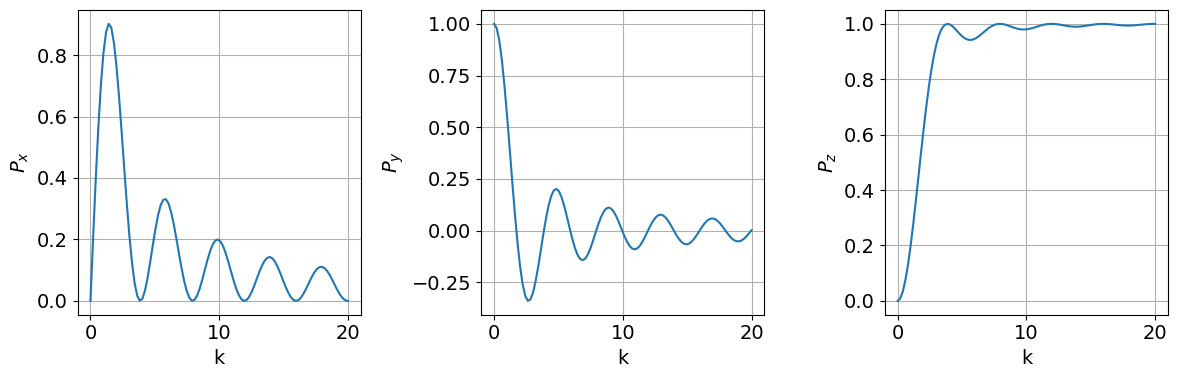

In [12]:
#plotting the polarization along each axis in terms of k
k_arr = np.linspace(0, 20, 100)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1, 3, figsize=(12,4))

P_t_FRLab_1 = P_t_FRLab_90[0].replace(P0, 1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[0].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[0].set_xlabel('k')
axs[0].set_ylabel('$P_x$')

P_t_FRLab_1 = P_t_FRLab_90[1].replace(P0, 1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[1].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[1].set_xlabel('k')
axs[1].set_ylabel('$P_y$')

P_t_FRLab_1 = P_t_FRLab_90[2].replace(P0, 1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[2].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[2].set_xlabel('k')
axs[2].set_ylabel('$P_z$')

fig.tight_layout()
axs[0].grid()
axs[1].grid()
axs[2].grid()
plt.savefig('Photos/Kgraphs_analytic.pdf')
plt.show()

## an exploration of other theta values

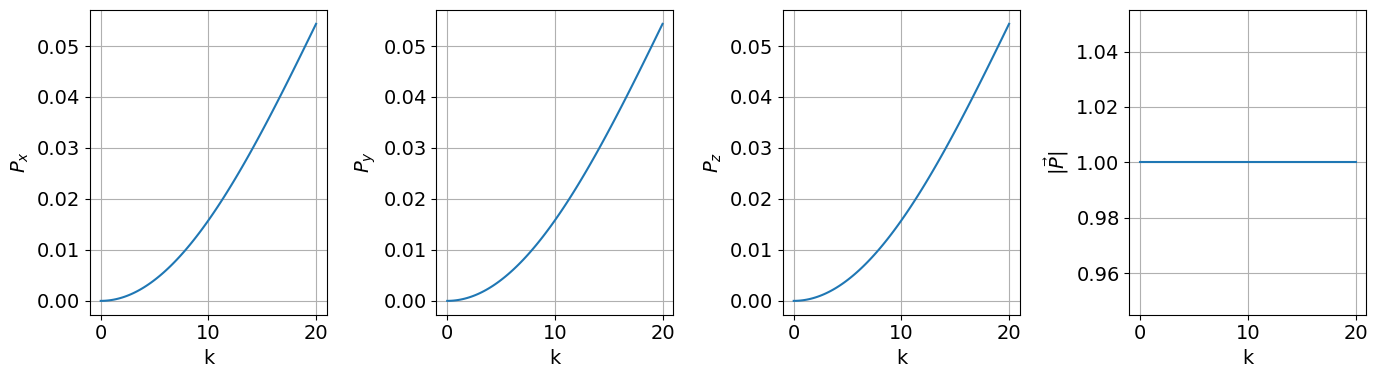

In [37]:
#plotting the polarization along each axis in terms of k
k_arr = np.linspace(0, 20, 100)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1, 4, figsize=(14,4))

P_t_FRLab_1 = P_t_FRLab_90[0].replace(P0, 1)
P_t_FRLab_functx = sp.lambdify(k, P_t_FRLab_1)
axs[0].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[0].set_xlabel('k')
axs[0].set_ylabel('$P_x$')

P_t_FRLab_1 = P_t_FRLab_90[1].replace(P0, 1)
P_t_FRLab_functy = sp.lambdify(k, P_t_FRLab_1)
axs[1].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[1].set_xlabel('k')
axs[1].set_ylabel('$P_y$')

P_t_FRLab_1 = P_t_FRLab_90[2].replace(P0, 1)
P_t_FRLab_functz = sp.lambdify(k, P_t_FRLab_1)
axs[2].plot(k_arr, P_t_FRLab_functz(k_arr))
axs[2].set_xlabel('k')
axs[2].set_ylabel('$P_z$')

P_t_FRLab_1 = P_t_FRLab_90[2].replace(P0, 1)
P_t_FRLab_functz = sp.lambdify(k, P_t_FRLab_1)
axs[3].plot(k_arr, np.sqrt(P_t_FRLab_functx(k_arr)**2 + P_t_FRLab_functy(k_arr)**2+P_t_FRLab_functz(k_arr)**2))
axs[3].set_xlabel('k')
axs[3].set_ylabel('$|\\vec{P}|$')

fig.tight_layout()
axs[0].grid()
axs[1].grid()
axs[2].grid()
axs[3].grid()

plt.show()

What if theta is really small?

In [38]:
P_t_FRLab_small = sp.simplify(P_t_FRLab_theta.replace(the, 0.1))

display(sp.Eq(Plab_k.replace(the, sp.pi/2), P_t_FRLab_small, evaluate=False))

Eq(P_{lab}(k, pi/2), Matrix([
[                                                                                                                    P_0*k*(1 - cos(0.1*sqrt(k**2 + 1)))/(k**2 + 1)],
[P_0*((0.0998334166468282*k**2 + 0.0998334166468282)*sin(0.1*sqrt(k**2 + 1)) + 0.995004165278026*sqrt(k**2 + 1)*(k**2 + cos(0.1*sqrt(k**2 + 1))))/(k**2 + 1)**(3/2)],
[                 P_0*(0.0998334166468282*sqrt(k**2 + 1)*(k**2 + cos(0.1*sqrt(k**2 + 1))) - 0.995004165278026*(k**2 + 1)*sin(0.1*sqrt(k**2 + 1)))/(k**2 + 1)**(3/2)]]))

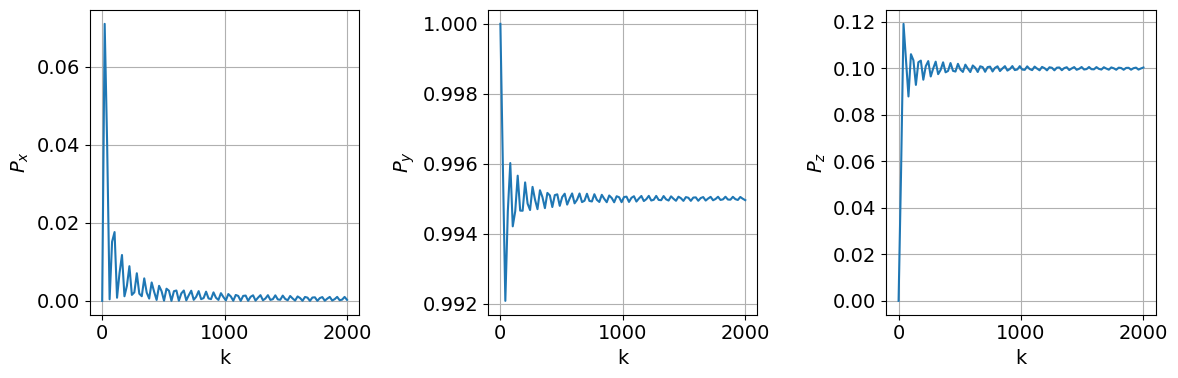

In [39]:
#plotting the polarization along each axis in terms of k
k_arr = np.linspace(0, 2000, 100)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(1, 3, figsize=(12,4))

P_t_FRLab_1 = P_t_FRLab_small[0].replace(P0, 1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[0].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[0].set_xlabel('k')
axs[0].set_ylabel('$P_x$')

P_t_FRLab_1 = P_t_FRLab_small[1].replace(P0, 1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[1].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[1].set_xlabel('k')
axs[1].set_ylabel('$P_y$')

P_t_FRLab_1 = P_t_FRLab_small[2].replace(P0, 1)
P_t_FRLab_funct = sp.lambdify(k, P_t_FRLab_1)
axs[2].plot(k_arr, P_t_FRLab_funct(k_arr))
axs[2].set_xlabel('k')
axs[2].set_ylabel('$P_z$')

fig.tight_layout()
axs[0].grid()
axs[1].grid()
axs[2].grid()
# plt.savefig('Photos/Kgraphs_analytic.pdf')
plt.show()

In [18]:
P_t_FRLab_90 = sp.simplify(P_t_FRLab_theta.replace(the, 0))
display(sp.Eq(Plab_k.replace(the, 0), P_t_FRLab_90, evaluate=False))

Eq(P_{lab}(k, 0), Matrix([
[  0],
[P_0],
[  0]]))

## The Adiabatic parameter for straight paths
A quick little graph for non-rotating spin transport. Here the equation is:

$$
P = 1 - e^{-\pi k}
$$

Assuming first that the field is mainly along the axis of the neutron guide, $B_{\|} \gg B_{\perp}$, the probably of depolarization, decreases exponentially with k.

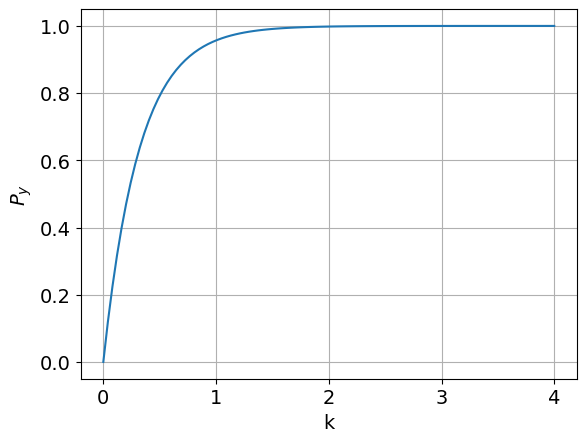

In [13]:
#plotting the polarization along the intial axis in terms of k
P_straight = lambda k: 1-np.exp(-np.pi*k)
k_arr = np.linspace(0, 4, 100)

plt.plot(k_arr, P_straight(k_arr))

# P_straight = lambda k: 1-np.exp(-np.pi*k/2)
# k_arr = np.linspace(0, 4, 100)

# plt.plot(k_arr, P_straight(k_arr))

plt.xlabel('k')
plt.ylabel('$P_y$')
plt.grid()
plt.savefig('Photos/Kgraphs_analytic_straight.pdf')
plt.show()